In [1]:
%run notebook_setup

theano version: 1.0.4
pymc3 version: 3.7
exoplanet version: 0.3.3
scipy version: 1.5.2


In [2]:
data_tj = pd.read_csv("../../data/TOI1055_harps_serval-tianjun.csv", sep=',')
data_mb = pd.read_csv('../../data/harps_rvs_with_serval.csv', sep=',')

In [3]:
data_tj.columns

Index(['BJD', 'RV', 'RVerr', 'CRX', 'CRXerr', 'dLW', 'dLWerr', 'bis', 'fwhm',
       's_hk', 'e_s_hk'],
      dtype='object')

In [4]:
data_mb.columns

Index(['bjd', 'rv_serval', 'e_rv_serval', 'crx', 'e_crx', 'dlw', 'e_dlw',
       'filename', 'date', 'obj', 'rv', 'e_rv', 'exptime', 'progid', 'airm',
       'drift', 'bis', 'fwhm', 's_hk', 'e_s_hk', 'snr'],
      dtype='object')

In [5]:
time_diff = data_tj.BJD - data_mb.bjd
time_diff *= 24. * 60.
print('tianjun dates have an offset of {0:.3f} +/- {1:.3f} minutes relative to megan dates'.format(np.mean(time_diff), np.std(time_diff)))

tianjun dates have an offset of -1.132 +/- 0.014 minutes relative to megan dates


idk what that's about... but the FWHM, BIS, and S_HK match up to within machine precision, so there's no problem with the observations being mis-matched. and hopefully some extra noise with an amplitude of a few seconds doesn't make any difference for a multi-day planet!

In [6]:
t = np.asarray(data_tj.BJD)
rv_serval_tj = np.asarray(data_tj.RV)
rv_serval_tj_err = np.asarray(data_tj.RVerr)
rv_serval_mb = np.asarray(data_mb.rv_serval)
rv_serval_mb_err = np.asarray(data_mb.e_rv_serval)
rv_harps = np.asarray(data_mb.rv)
rv_harps_err = np.asarray(data_mb.e_rv)

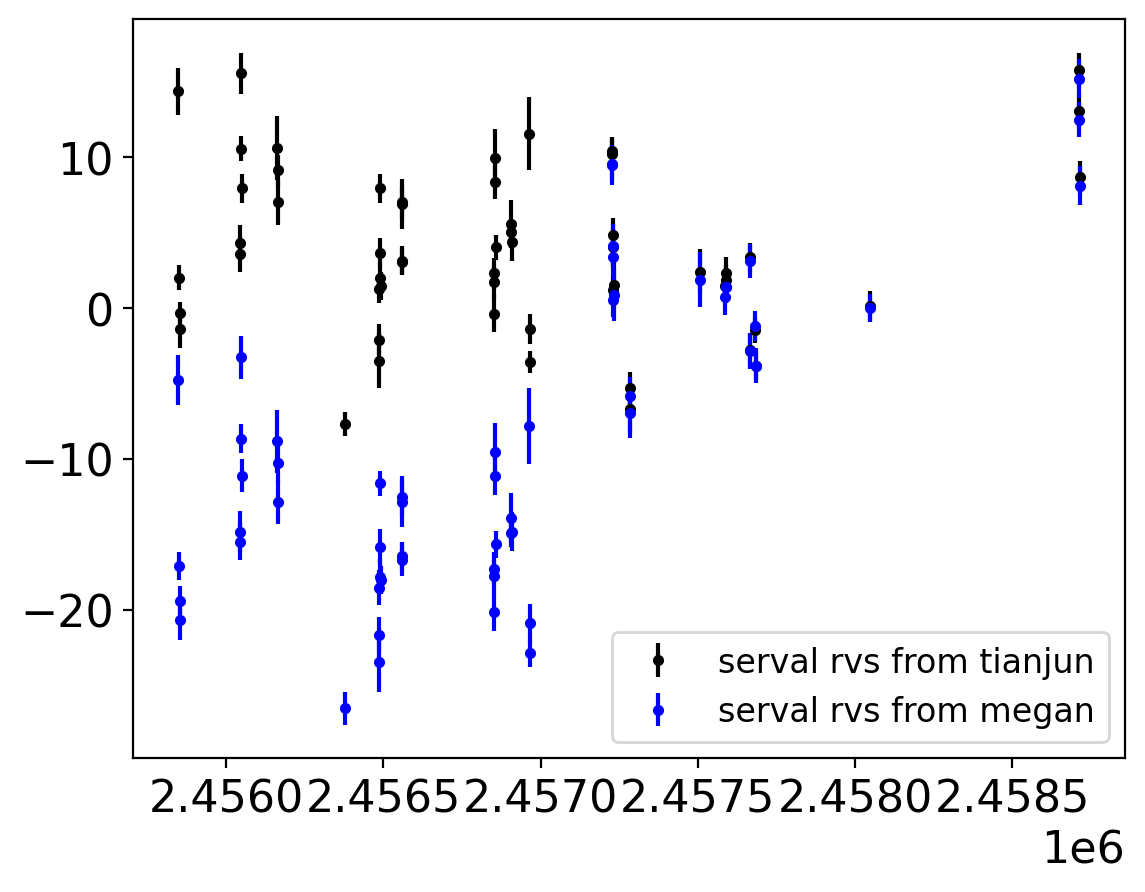

In [7]:
plt.errorbar(t, rv_serval_tj, rv_serval_tj_err, fmt='k.', label='serval rvs from tianjun')
plt.errorbar(t, rv_serval_mb, rv_serval_mb_err, fmt='b.', label='serval rvs from megan')
#plt.errorbar(t, rv_harps - np.median(rv_harps[0:30], rv_harps_err, fmt='r.', label='harps drs rvs')
plt.legend(fontsize=12);

In [8]:
# subtract off the instrumental offset from megan rvs:
HARPS_upgrade = 2457218.5 # July 2015
pug = np.ascontiguousarray(t >= HARPS_upgrade, dtype=bool) # stands for post-upgrade, obviously
rv_serval_mb[pug] -= 15.4
rv_serval_mb -= np.median(rv_serval_mb)
rv_harps[pug] -= 15.4
rv_harps -= np.median(rv_harps)

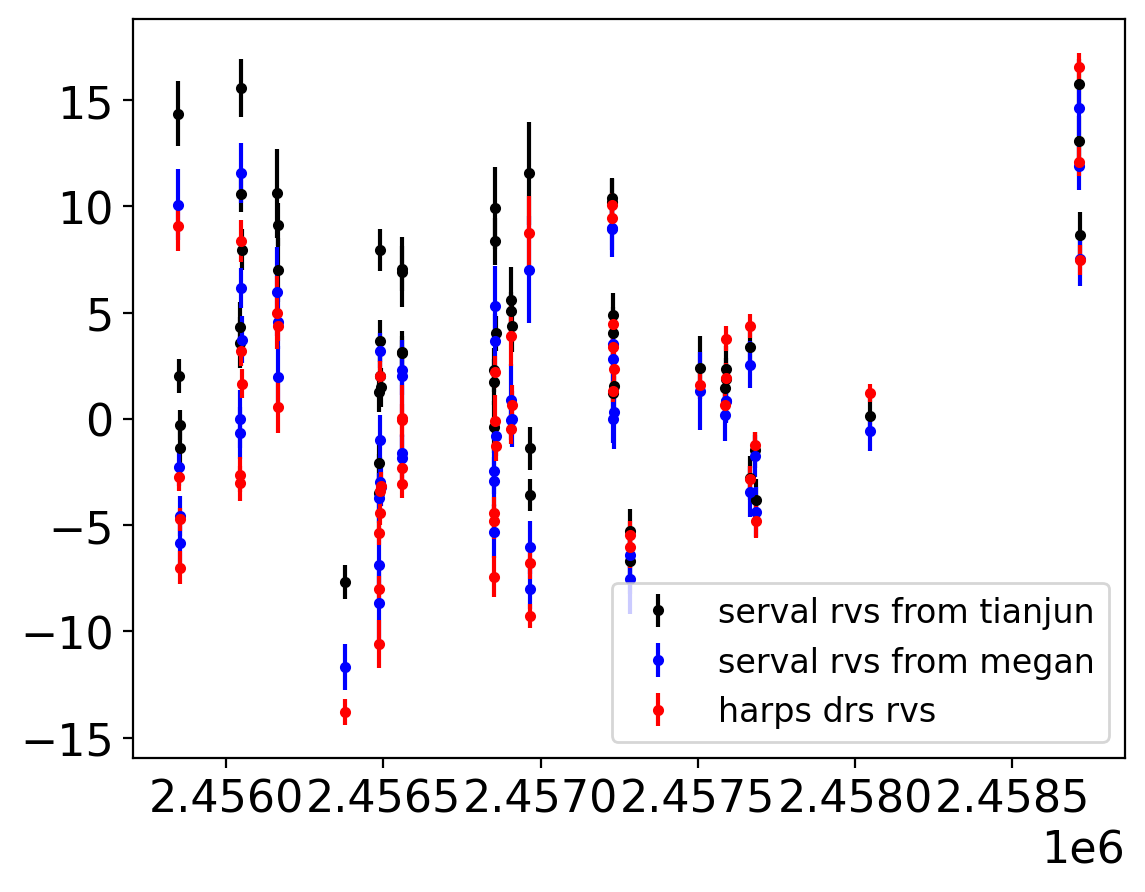

In [9]:
plt.errorbar(t, rv_serval_tj, rv_serval_tj_err, fmt='k.', label='serval rvs from tianjun')
plt.errorbar(t, rv_serval_mb, rv_serval_mb_err, fmt='b.', label='serval rvs from megan')
plt.errorbar(t, rv_harps, rv_harps_err, fmt='r.', label='harps drs rvs')
plt.legend(fontsize=12);

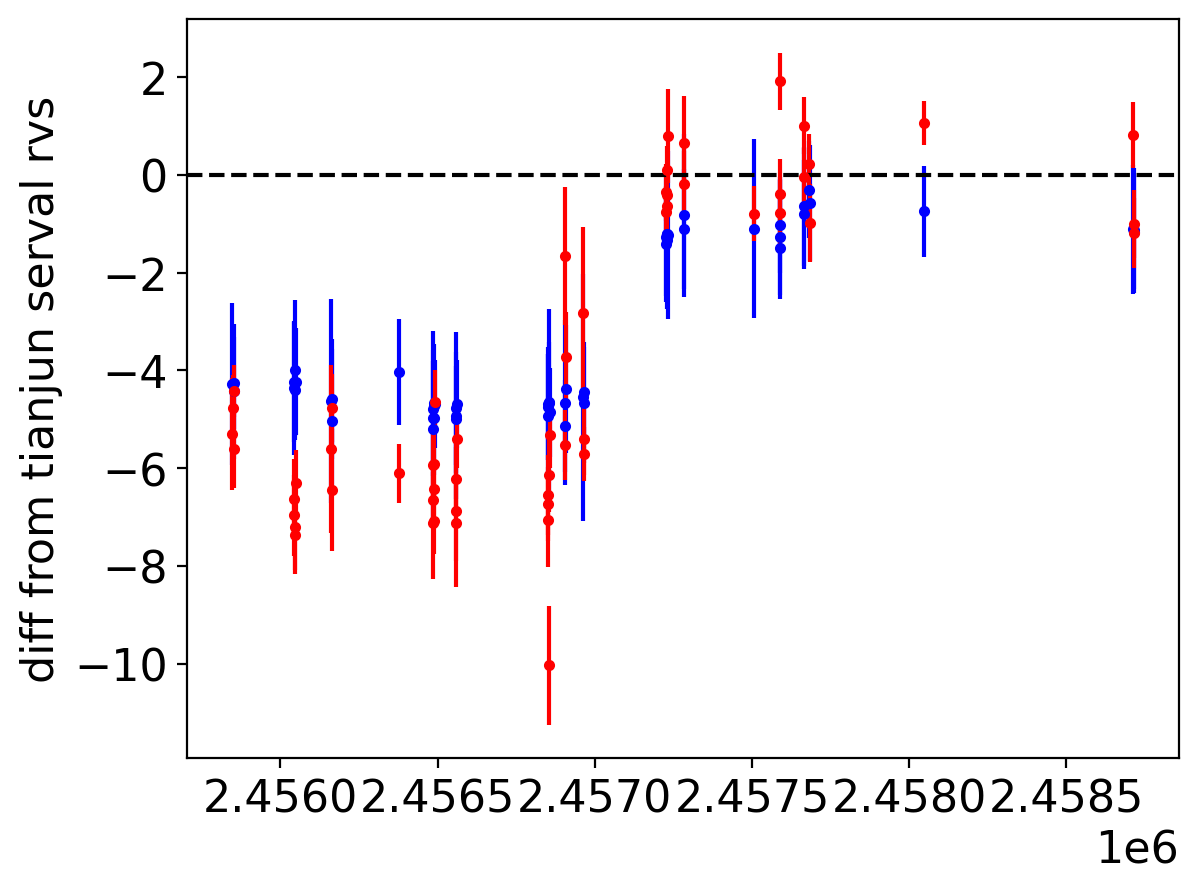

In [10]:
plt.errorbar(t, rv_serval_mb - rv_serval_tj, rv_serval_mb_err, fmt='b.', label='serval rvs from megan')
plt.errorbar(t, rv_harps - rv_serval_tj, rv_harps_err, fmt='r.', label='harps drs rvs')
plt.axhline(0., ls='--', c='k')
plt.ylabel('diff from tianjun serval rvs');

looks like Tianjun's median-subtracting approach gives a different pre-/post-upgrade result than my 15.4 m/s offset does. let's try that instead.

In [11]:
rv_serval_mb[pug] += 15.4 # back to before
rv_serval_mb[pug] -= np.median(rv_serval_mb[pug])
rv_serval_mb[~pug] -= np.median(rv_serval_mb[~pug])
rv_harps[pug] += 15.4 # back to before
rv_harps[pug] -= np.median(rv_harps[pug])
rv_harps[~pug] -= np.median(rv_harps[~pug])

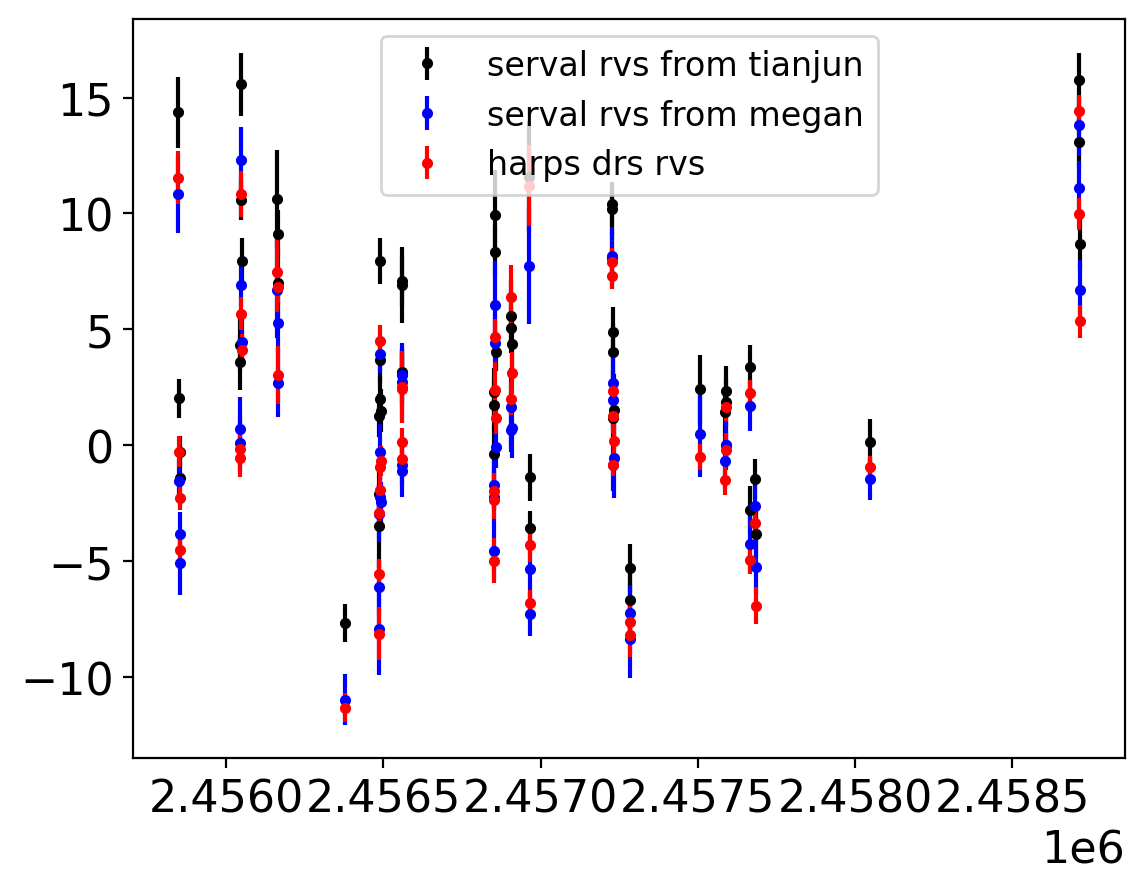

In [12]:
plt.errorbar(t, rv_serval_tj, rv_serval_tj_err, fmt='k.', label='serval rvs from tianjun')
plt.errorbar(t, rv_serval_mb, rv_serval_mb_err, fmt='b.', label='serval rvs from megan')
plt.errorbar(t, rv_harps, rv_harps_err, fmt='r.', label='harps drs rvs')
plt.legend(fontsize=12);

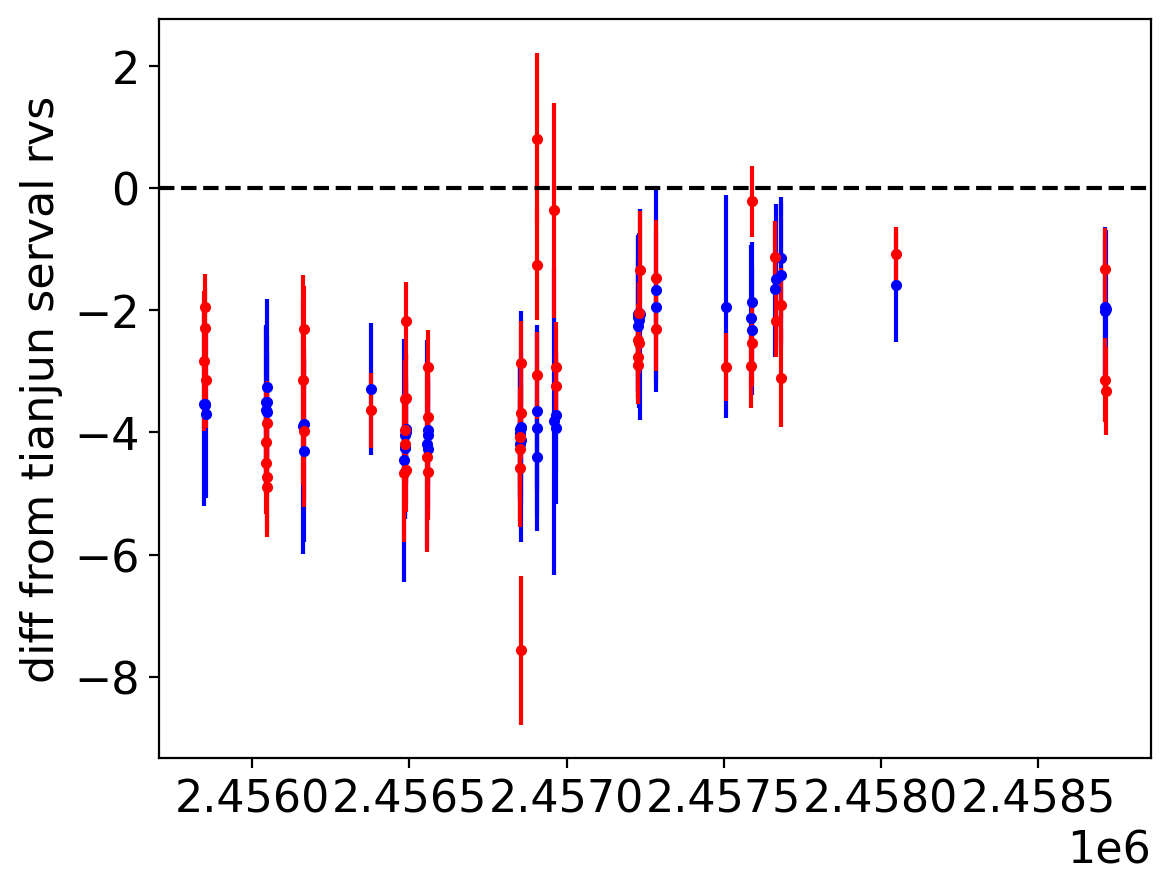

In [13]:
plt.errorbar(t, rv_serval_mb - rv_serval_tj, rv_serval_mb_err, fmt='b.', label='serval rvs from megan')
plt.errorbar(t, rv_harps - rv_serval_tj, rv_harps_err, fmt='r.', label='harps drs rvs')
plt.axhline(0., ls='--', c='k')
plt.ylabel('diff from tianjun serval rvs');